# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix DEPRECATED
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [4]:
df = pd.read_csv('base_tratada.csv', index_col=0)

In [8]:
X = df.drop('sexo', axis=1)
X
            

,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,mau,qtd_filhos_1,...,tipo_residencia_Rented apartment,tipo_residencia_With parents,qt_pessoas_residencia_2.0,qt_pessoas_residencia_3.0,qt_pessoas_residencia_4.0,qt_pessoas_residencia_5.0,qt_pessoas_residencia_6.0,qt_pessoas_residencia_7.0,qt_pessoas_residencia_9.0,qt_pessoas_residencia_15.0
0,1,1,58.832877,3.106849,1,0,0,0,False,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,52.356164,8.358904,1,0,1,1,False,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,52.356164,8.358904,1,0,1,1,False,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,46.224658,2.106849,1,1,1,1,False,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,29.230137,3.021918,1,0,0,0,False,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,1,54.109589,9.884932,1,0,0,0,True,0,...,0,0,1,0,0,0,0,0,0,0
16646,0,1,43.389041,7.380822,1,1,1,0,True,0,...,0,0,1,0,0,0,0,0,0,0
16647,1,1,30.005479,9.800000,1,1,0,0,True,0,...,0,0,1,0,0,0,0,0,0,0
16648,1,1,30.005479,9.800000,1,1,0,0,True,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
y = df['sexo']
y

0        1
1        0
2        0
3        1
4        0
        ..
16645    0
16646    0
16647    1
16648    1
16649    0
Name: sexo, Length: 16650, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [27]:
modelo = DecisionTreeClassifier(random_state=100)
modelo = modelo.fit(X_train, y_train)

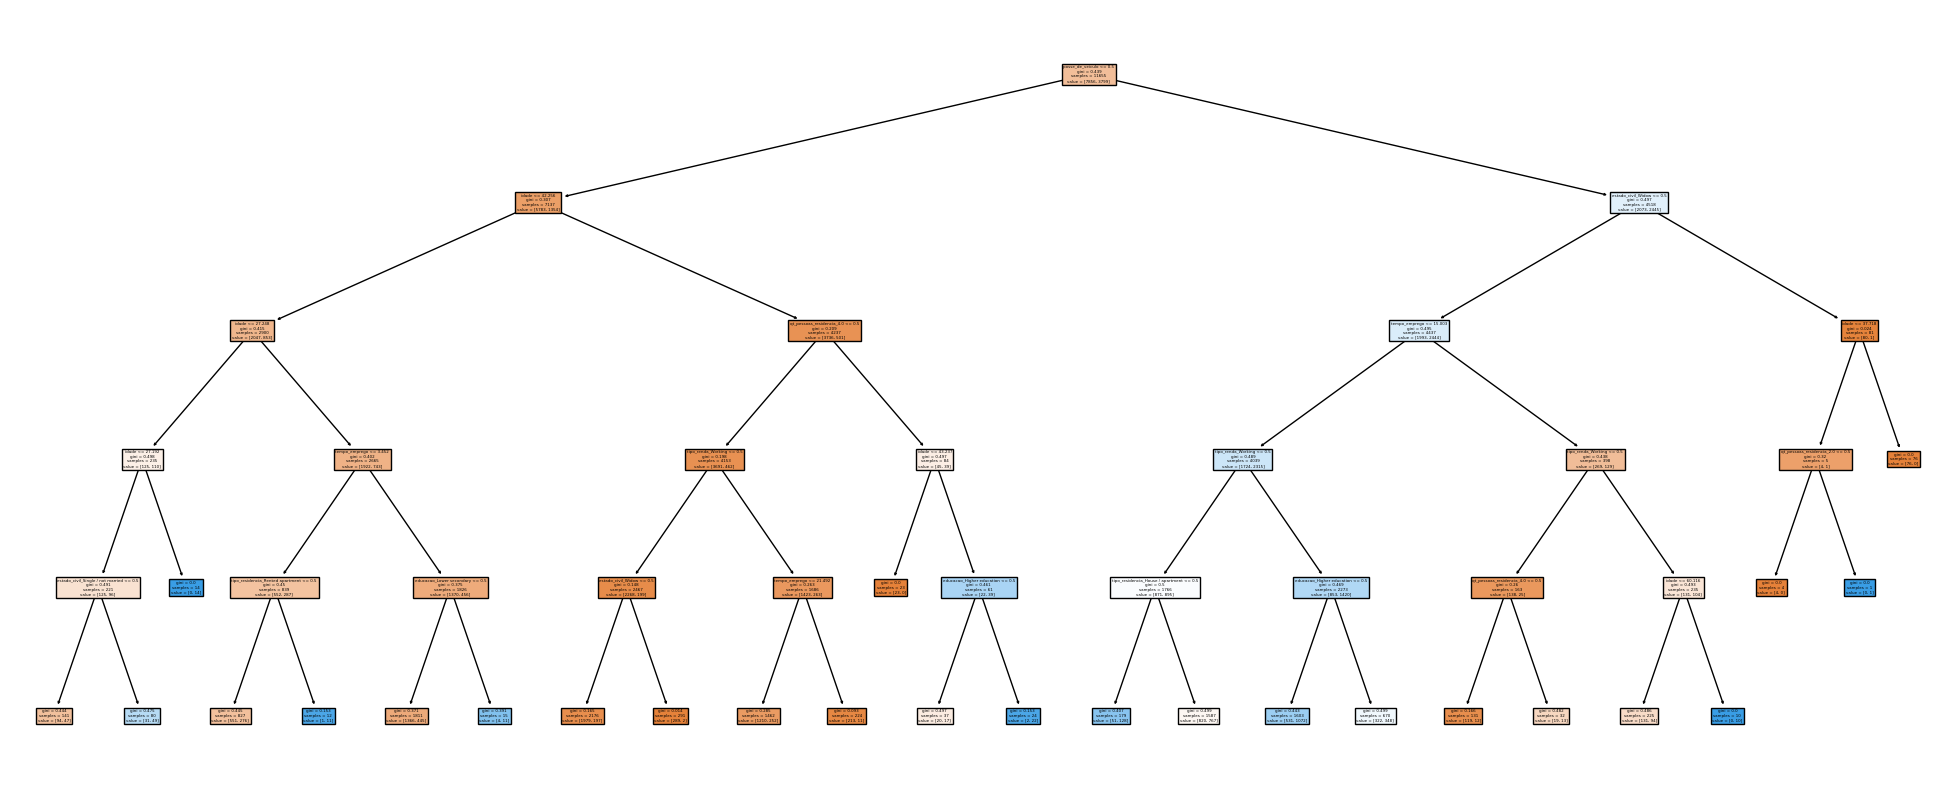

In [26]:
plt.figure(figsize=(25, 10))
plot_tree(modelo,
          filled=True,
          feature_names=X.columns);

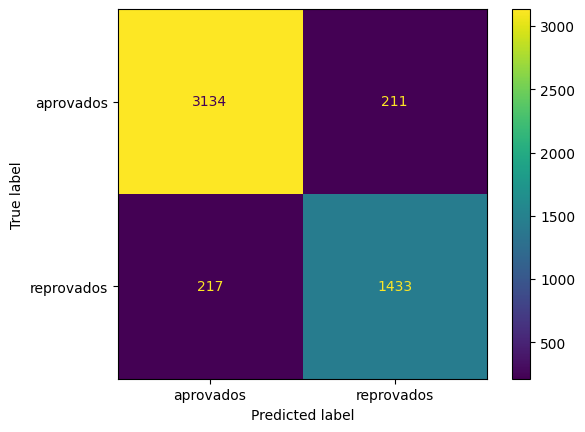

In [29]:
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, display_labels=['aprovados', 'reprovados'])

In [35]:
predicao_treino = modelo.predict(X_train)

In [36]:
accuracy_score(y_train, predicao_treino)

0.9997425997425997

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [39]:
predicao_teste = modelo.predict(X_test)

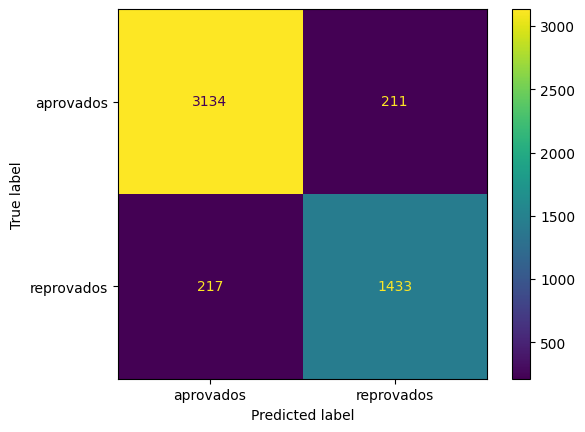

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, predicao_teste, display_labels=['aprovados', 'reprovados'])

In [40]:
accuracy_score(y_test, predicao_teste)

0.9143143143143143

In [46]:
# Novo modelo

modelo = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=10)
modelo = modelo.fit(X_train, y_train)

In [48]:
predicao = modelo.predict(X_test)
accuracy_score(y_test, predicao)

0.7279279279279279

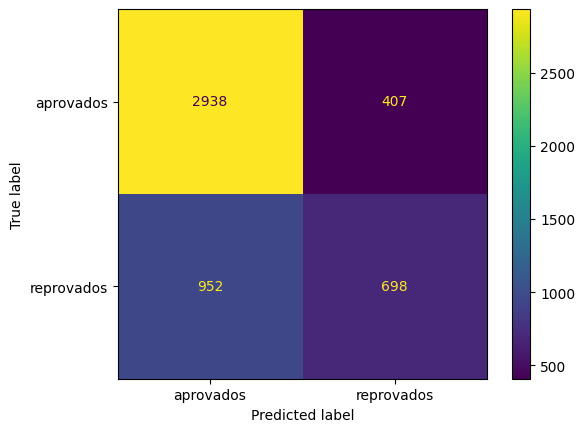

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, predicao, display_labels=['aprovados', 'reprovados'])

In [53]:
# Propoção de classificados como 'mau'

(698+407)/(698+407+2938+952)*100

22.12212212212212

In [55]:
# Se toda a classificação fosse de 'bons', seria 1 em todos os valores
predicao_bons = np.ones(len(predicao))
predicao_bons


array([1., 1., 1., ..., 1., 1., 1.])

In [56]:
accuracy_score(y_test, predicao_bons)

0.3303303303303303